In [663]:
import numpy as np
import matplotlib.pyplot as plt
import os
import apriltag
import skimage as ski
from skimage.morphology import erosion, square, dilation, binary_dilation, binary_erosion, disk
import cv2

In [664]:
def show_image(image):
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.show()

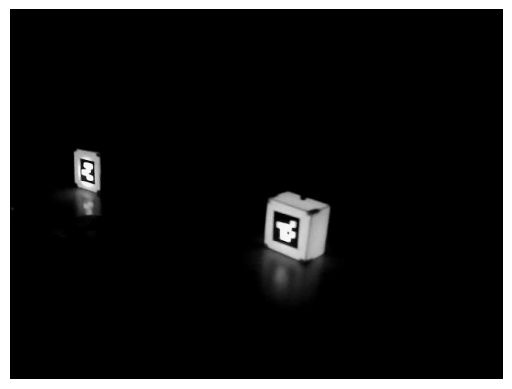

In [665]:
# load image

image = ski.io.imread('samples/frame16.png')
image = ski.color.rgb2gray(image)

show_image(image)

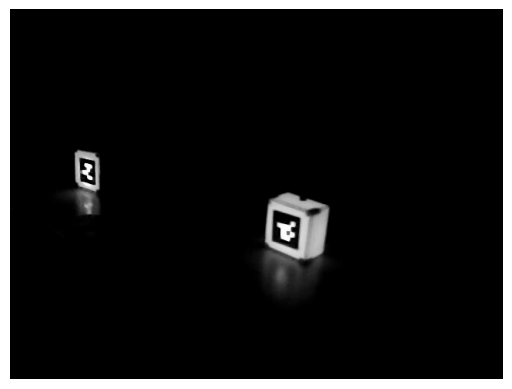

In [666]:
# erosion

image = erosion(image, square(3))

show_image(image)

In [667]:
# use threshold to generate binary image

# image = (image > 0.5) * 1.0
# image = binary_erosion(image, square(3))
# image = binary_dilation(image, square(3))

# show_image(image)

In [668]:
# colorize background

# labeled_image = ski.measure.label(np.invert(image), connectivity=2, return_num=False)
# groups_count, _ = np.histogram(labeled_image.flatten(), range(np.max(labeled_image) + 2))


# image[labeled_image == groups_count.argmax()] = 1.0

# show_image(image)

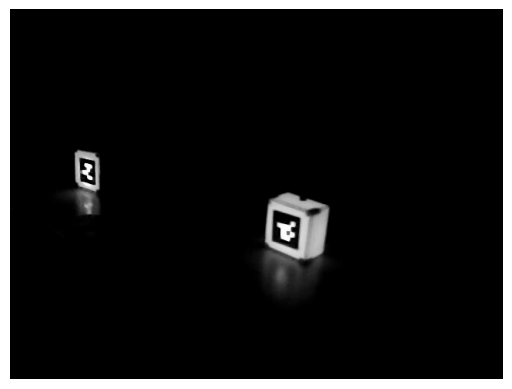

In [669]:
# pixelize
scale = 9
# temp = cv2.resize(image * 1.0, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)

# image = cv2.resize(temp, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)


# Initialize output image
# image = cv2.resize(temp, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_NEAREST_EXACT)

show_image(image)

In [670]:
# detect april tag

print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)
results = detector.detect(np.asarray(image * 255, np.uint8))
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 2 total AprilTags detected
